## Homework 2: Wine Quality Prediction Using SGD
### Student Name: Graeme Holliday
### Department: Computer Science
### Course: CS 474/574: Deep Learning/2020 Fall
### Due: 09/25/2020


Description: In this homework, you are going to implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

2. SGD implementation. 35 pts
    - Shuffle data (X and Y) at the beginning of each epoch. (10 pts)
    - update w using minibatches correctly. (10 pts)
    - record the loss and w at the end of each epoch. (10 pts)
    - Decay learning rate at the end of each epoch. (5 points)
    
3. Evaluation (cross-validation). 65 pts
    - Split the dataset into training (70%) and test (30%) sets. (10 points)
    - Calculate and print out the MSE and MAE of GD for the training and test sets, respectively. (20 points)
        - Print formate: 
            The training MSE is: , the traing MAE is: .
            The test MSE is: , the test MAE is: .               
    - Calculate and print out the MSE and MAE of SGD for the training and test sets, respectively. (20 points)
         - Print formate: 
            The training MSE is: , the traing MAE is: .
            The test MSE is: , the test MAE is: . 
            
    - Plot the loss curve for SGD. (5 points)
        - tip: using the 'plot' function in matplotlib
        
    - Plot the mse curves on the training and test sets, respectively, over the weight sequence (w_hist). (10 points)

In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df = pd.read_csv('winequality-white.csv', sep = ';')
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = np.sum(np.square(Y - Y_hat)) / 2
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w) - b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr * gradient        
        gradient = A.T.dot(np.dot(A, w) - b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


In [142]:
# shuffle two arrays while maintaining their relation to each other.
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [143]:
# create separate training and test data sets
def train_test_split(X, Y, train_size, shuffle=True):
    if shuffle:
        x, y = shuffle_in_unison(X, Y)
    
    # split
    x_train = x[:train_size]
    y_train = y[:train_size]
    x_test = x[train_size:]
    y_test = y[train_size:]
    
    return x_train, y_train, x_test, y_test

In [193]:
# Optimization 2: implement the minibatch Gradient Descent approach
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100, decay = 0.01):
    '''
    X: training data
    Y: training target
    lr: learning rate
    batch_size: batch size
    epoch: number of max epoches
    
    return: w_star, loss_hist, w_hist
    '''
    
    m = len(Y)
    w = np.random.rand(X.shape[1] + 1, 1)
    loss_hist = np.zeros(epoch) # loss history
    w_hist = np.zeros((epoch, w.shape[0])) # w history

    # Add your code here
    #------------------------
    for i in range(epoch):
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        w_hist[i, :] = w.T
        x, y = shuffle_in_unison(X, Y)
        
        # break data into minibatches
        x_batches = np.array_split(x, int(m / batch_size))
        y_batches = np.array_split(y, int(m / batch_size))
        
        # iterate over batches
        for j in range(len(y_batches)):
            # format batch data
            A = x_batches[j]
            b = y_batches[j]
            n = b.shape[0]
            A = np.c_[np.ones((n, 1)), A]
            b = np.expand_dims(b, axis=-1)
            
            # update w
            w = w - lr * A.T.dot(np.dot(A, w) - b)

        lr /= 1 + decay * i # simple lr decay
    #--------------------------
    
    w_star = w
    return w_star, loss_hist, w_hist

0 loss: 36923893.855753556
1 loss: inf
2 loss: nan
3 loss: nan
4 loss: nan


<ipython-input-193-452b74e6dd1d>:41: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * A.T.dot(np.dot(A, w) - b)


5 loss: nan
6 loss: nan
7 loss: nan
8 loss: nan
9 loss: nan
10 loss: nan
11 loss: nan
12 loss: nan
13 loss: nan
14 loss: nan
15 loss: nan
16 loss: nan
17 loss: nan
18 loss: nan
19 loss: nan
20 loss: nan
21 loss: nan
22 loss: nan
23 loss: nan
24 loss: nan
25 loss: nan
26 loss: nan
27 loss: nan
28 loss: nan
29 loss: nan
30 loss: nan
31 loss: nan
32 loss: nan
33 loss: nan
34 loss: nan
35 loss: nan
36 loss: nan
37 loss: nan
38 loss: nan
39 loss: nan
40 loss: nan
41 loss: nan
42 loss: nan
43 loss: nan
44 loss: nan
45 loss: nan
46 loss: nan
47 loss: nan
48 loss: nan
49 loss: nan
50 loss: nan
51 loss: nan
52 loss: nan
53 loss: nan
54 loss: nan
55 loss: nan
56 loss: nan
57 loss: nan
58 loss: nan
59 loss: nan
60 loss: nan
61 loss: nan
62 loss: nan
63 loss: nan
64 loss: nan
65 loss: nan
66 loss: nan
67 loss: nan
68 loss: nan
69 loss: nan
70 loss: nan
71 loss: nan
72 loss: nan
73 loss: nan
74 loss: nan
75 loss: nan
76 loss: nan
77 loss: nan
78 loss: nan
79 loss: nan
80 loss: nan
81 loss: nan
82 l

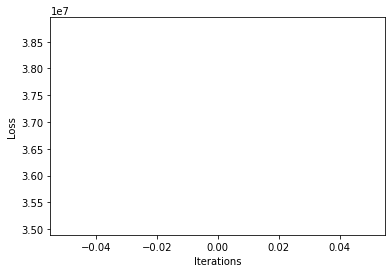

'\n3. Evaluation (cross-validation). 65 pts\n- Calculate and print out the MSE and MAE of GD for the training and test sets, respectively. (20 points)\n- Calculate and print out the MSE and MAE of SGD for the training and test sets, respectively. (20 points)\n- Plot the loss curve for SGD. (5 points)\n- Plot the mse curves on the training and test sets, respectively, over the weight sequence (w_hist). (10 points)\n'

In [194]:
# use 70% of data for training
x_train, y_train, x_test, y_test = train_test_split(X, Y, int(0.7 * Y.shape[0]))

# run SGD to find w_star
epochs = 100
w_star_sgd, loss_hist_sgd, w_hist_sgd = SGD(x_train, y_train, epoch=epochs, decay=0.01)

#y_train_hat = predict(x_train, w_star)
#y_test_hat = predict(x_test, w_star)
# compare those MSEs and MAEs, print them
# also plot them

# show the Loss curve
plt.plot(range(epochs), loss_hist_sgd)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

'''
3. Evaluation (cross-validation). 65 pts
- Calculate and print out the MSE and MAE of GD for the training and test sets, respectively. (20 points)
- Calculate and print out the MSE and MAE of SGD for the training and test sets, respectively. (20 points)
- Plot the loss curve for SGD. (5 points)
- Plot the mse curves on the training and test sets, respectively, over the weight sequence (w_hist). (10 points)
'''

0 loss: 36102934.518615514
1 loss: 4.3882471714613875e+17
2 loss: 5.33622726193715e+27
3 loss: 6.488996810581072e+37
4 loss: 7.890795789024872e+47
5 loss: 9.595421295717516e+57
6 loss: 1.1668292058751569e+68
7 loss: 1.4188959022475522e+78
8 loss: 1.725415828878646e+88
9 loss: 2.0981523576389768e+98


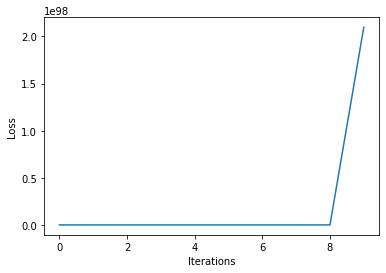

In [146]:
# Example
w_star, loss_hist, w_hist = GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 10)

# show the Loss curve
plt.plot(range(10), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()